In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv2.__version__

'4.6.0'

In [3]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
 
# в директории Images хранятся папки со всеми изображениями
imagePaths = list(paths.list_images(r'D:\TeachMeSkills\DZ\dz22\HP'))
knownEncodings = []
knownNames = []
# перебираем все папки с изображениями
for (i, imagePath) in enumerate(imagePaths):
    # извлекаем имя человека из названия папки
    name = imagePath.split(os.path.sep)[-2]
    # загружаем изображение и конвертируем его из BGR (OpenCV ordering)
    # в dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #используем библиотеку Face_recognition для обнаружения лиц
    boxes = face_recognition.face_locations(rgb,model='hog')
    # вычисляем эмбеддинги для каждого лица
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)
# сохраним эмбеддинги вместе с их именами в формате словаря
data = {"encodings": knownEncodings, "names": knownNames}
# для сохранения данных в файл используем метод pickle
f = open(r"D:\TeachMeSkills\DZ\dz22\face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

In [4]:
#cascPathface = os.path.dirname(r"D:\TeachMeSkills\DZ\dz22\haarcascade_frontalface_alt2.xml")
# Загружаем файл каскада Хаарта
faceCascade = cv2.CascadeClassifier(r"D:\TeachMeSkills\DZ\dz22\haarcascade_frontalface_alt2.xml")

In [12]:
# Считываем данные с файла эмбеддингов
data = pickle.loads(open(r'D:\TeachMeSkills\DZ\dz22\face_enc', "rb").read())
# Загружаем картинку на которой будем искать лица
image = cv2.imread(r'D:\TeachMeSkills\DZ\dz22\6.png')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# преобразуем изображение в серое для каскада
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)


encodings = face_recognition.face_encodings(rgb)
names = []


In [13]:
#проходим по всем найденным лицам на фото и сравниваем их с эмбедингами
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"],
    encoding)
   
    name = "Unknown"

    if True in matches:
        # сохраняем индексы тех лиц, которые были найдены в эмбедингах
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1
            name = max(counts, key=counts.get)
        names.append(name)
        for ((x, y, w, h), name) in zip(faces, names):
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
             0.75, (0, 255, 0), 2)

In [15]:
cv2.imshow("Frame", image)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

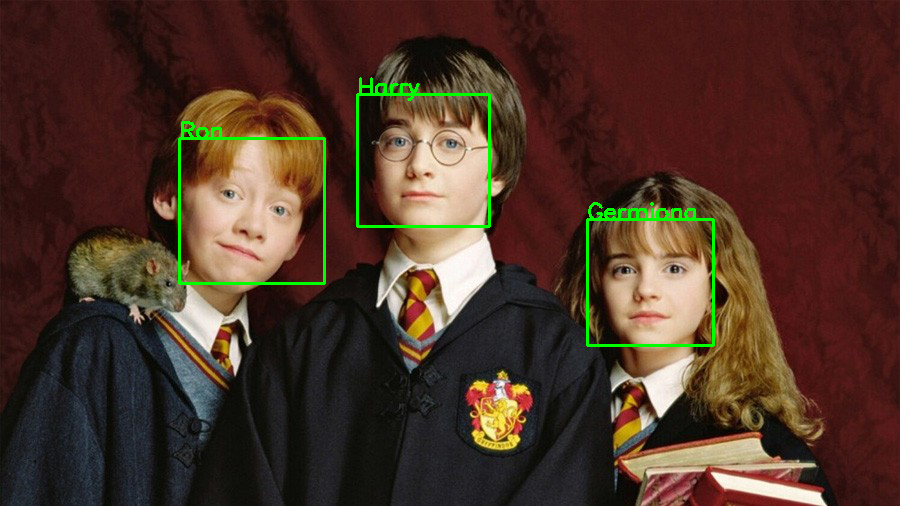

Не всегда определяет все отлично )

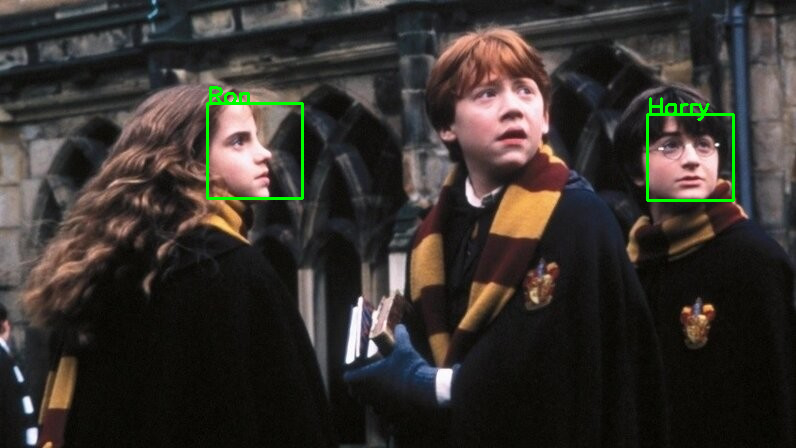

Но может определить лицо на взрослой фотке и в угаре

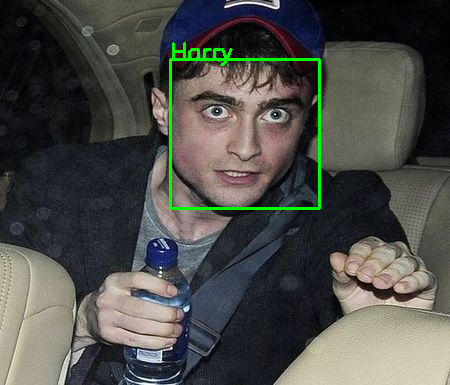